# K-means

This notebook covers the first part of the 7th exercise of the Machine Learning course at Coursera (the second part is about PCA).

It focuss on applying the K-means clustering algorithm in two situations: (1) a simple 2D dataset example to understand the algorithm mechanics, and (2) an image compression.

In [1]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
import matplotlib.pyplot as plt
%matplotlib inline

## K-means implementation

In [8]:
# Function the finds the closest centroid (Cluster Assignment)
# params:
# - X: data matrix [num_samples x num_features]
# - centroids: location of centroids [num_clusters x num_features]
# returns:
# - assigned_clusters: array of indexes of assigned clusters [num_samples x 1]
def find_closest_centroids(X, centroids):

    # init aux variables
    num_samples = X.shape[0] # m
    num_clusters = centroids.shape[0] # K
    assigned_clusters = np.zeros(num_samples) # indexes of assigned cluster (or centroid)
    
    # for each sample
    for s in range(num_samples):
        min_dist = 1000000 # large enough value to represent Inf
        
        # for each cluster
        for c in range(num_clusters):
            # compute the distance as |x-µ|^2
            dist = np.sum(np.power(X[s,:] - centroids[c,:], 2))
                            
            # keep if it is the minimum distance
            if dist < min_dist:
                min_dist = dist
                assigned_clusters[s] = c
    
    return assigned_clusters

In [19]:
# Function that computes the centroids (Centroid Moving)
# params:
# - X: data matrix [num_samples x num_features]
# - assigned_clusters: array of indexes of assigned clusters [num_samples x 1]
# - num_clusters: number of clusters
# returns:
# - centroids: new location of centroids [num_clusters x num_features] 
def compute_centroids(X, assigned_clusters, num_clusters):
    
    # init aux variables
    num_features = X.shape[1]
    centroids = np.zeros((num_clusters, num_features))
    
    # for each cluster
    for c in range(num_clusters):
        # get those samples assigned to given cluster
        indices = np.where(assigned_clusters == c)
        
        # recompute the centroid of given cluster
        centroids[c,:] = (np.sum(X[indices,:], axis=1) / len(indices[0])).ravel()
    
    return centroids

In [24]:
# Function that inits the centroids selecting k random samples of X
# params:
# - X: data matrix [num_samples x num_features]
# - num_clusters: number of clusters
# returns:
# - centroids: location of centroids [num_clusters x num_features] 
def init_centroids(X, num_clusters):
    
    # init aux variables
    num_samples, num_features = X.shape
    centroids = np.zeros((num_clusters, num_features))
    
    # select random samples (create an array of size num_clusters and random values between 0 and num_samples)
    random_indexes = np.random.randint(0, num_samples, num_clusters) 
    
    # for each cluster
    for i in range(num_clusters):
        # assign to the cluster the sample in one of the random indexes
        centroids[i,:] = X[random_indexes[i],:]
    
    return centroids

In [31]:
# Function that runs K-means
# params:
# - X: data matrix [num_samples x num_features]
# - initial_centroids: set of initial centroids
# - num_iterations: number of iterations k-means will apply steps 1 and 2
# returns: 
# - assigned_clusters: array of indexes of assigned clusters [num_samples x 1] 
# - centroids: location of centroids [num_clusters x num_features] 
def run_k_means(X, initial_centroids, num_iterations):
    
    # init variables
    num_samples, num_features = X.shape
    num_clusters = initial_centroids.shape[0]
    assigned_clusters = np.zeros(num_samples)
    centroids = initial_centroids
    
    # for each iteration
    for i in range(num_iterations):
        # Cluster assignment (step 1)
        assigned_clusters = find_closest_centroids(X, centroids)

        # Centroid Moving (step 2)
        centroids = compute_centroids(X, assigned_clusters, num_clusters)
    
    return assigned_clusters, centroids

## K-means in a 2D space

In this scenario, we are going to apply k-means to a 2D data scenario with the objective to organize the data into 3 different clusters.

In [75]:
# load data
data = loadmat('ex7data2.mat')
X = data['X']
X.shape

(300, 2)

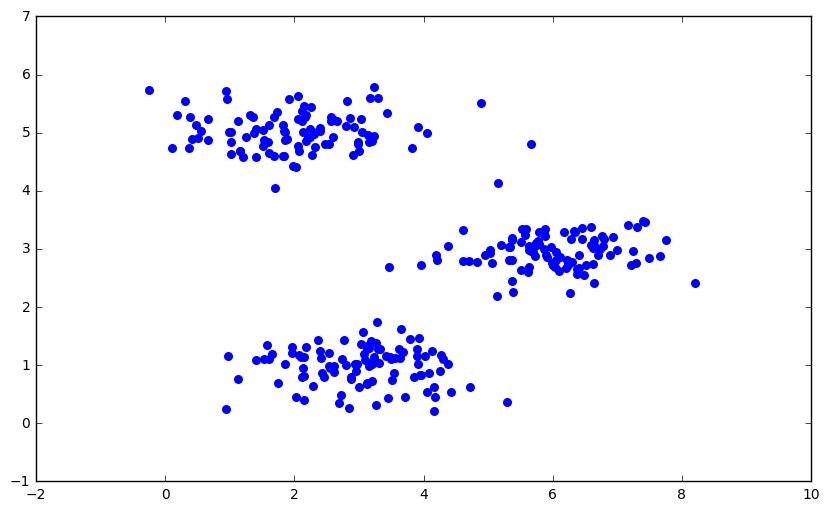

In [76]:
# plot data
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(X[:,0], X[:,1], s=30, color='b')

In [77]:
# init centroids
initial_centroids = init_centroids(X, 3);
print('initial_centroids\n', initial_centroids)

# Run K-means
assigned_clusters, final_centroids = run_k_means(X, initial_centroids, 5);
print('final_centroids\n', final_centroids)

initial_centroids
 [[ 3.49798412  1.10046402]
 [ 5.74036233  3.10391306]
 [ 1.52334113  4.87916159]]
final_centroids
 [[ 3.04367119  1.01541041]
 [ 6.03366736  3.00052511]
 [ 1.95399466  5.02557006]]


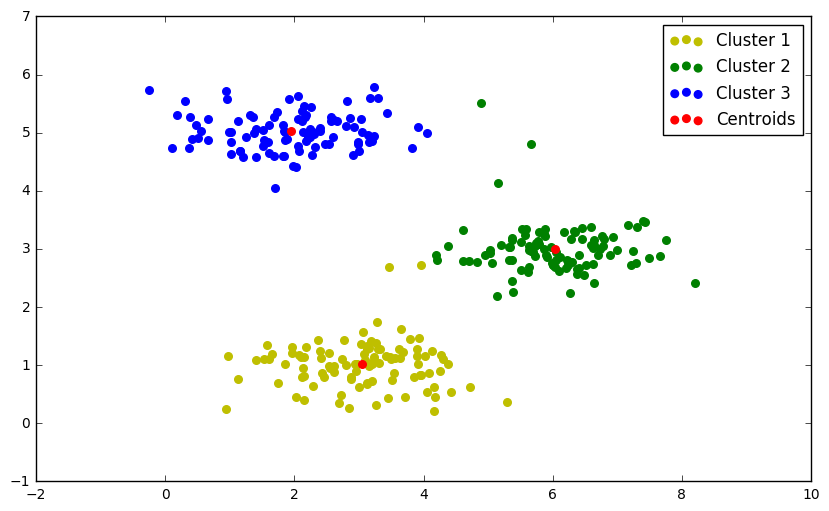

In [78]:
# plot data, clusters and centroid
cluster1 = X[np.where(assigned_clusters == 0)[0],:]
cluster2 = X[np.where(assigned_clusters == 1)[0],:]
cluster3 = X[np.where(assigned_clusters == 2)[0],:]

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(cluster1[:,0], cluster1[:,1], s=30, color='y', label='Cluster 1')
ax.scatter(cluster2[:,0], cluster2[:,1], s=30, color='g', label='Cluster 2')
ax.scatter(cluster3[:,0], cluster3[:,1], s=30, color='b', label='Cluster 3')
ax.scatter(final_centroids[:,0], final_centroids[:,1], s=30, color='r', label='Centroids')
ax.legend()

## K-means to compress an RGB image

In this second scenario, we will use K-means to compress an image of 128x128 pixels (each one encoded with 8 bits for each RGB value). We will compress to only use 16 colors (16 clusters) that better represent the image.

In [135]:
# load image data
original_image = loadmat('bird_small.mat')['A']
original_image.shape

(128, 128, 3)

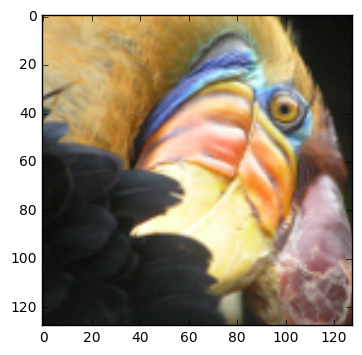

In [136]:
# visualize the original image
plt.imshow(original_image)

In [146]:
# normalize value ranges (easier clustering: i did some tests without normalizing and the compressed colors
# did not make sense at all... not clear the reason, but maybe because the algorithm needs a larger number 
# of iterations when not normalizing?)
original_image = original_image / 255.

# reshape the matrix with the image data into a 1D array
X = np.reshape(original_image, (original_image.shape[0] * original_image.shape[1], original_image.shape[2]))
X.shape

(16384, 3)

In [147]:
# init centroids
initial_centroids = init_centroids(X, 16);
print('initial_centroids\n', initial_centroids)

# Run K-means
assigned_clusters, final_centroids = run_k_means(X, initial_centroids, 10);
print('final_centroids\n', final_centroids)

initial_centroids
 [[ 0.08235294  0.09411765  0.08235294]
 [ 0.42745098  0.29803922  0.31372549]
 [ 0.19607843  0.18431373  0.16862745]
 [ 0.78039216  0.61568627  0.31764706]
 [ 0.83921569  0.7254902   0.76862745]
 [ 0.87843137  0.64705882  0.47843137]
 [ 0.30196078  0.31372549  0.33333333]
 [ 0.0745098   0.07843137  0.06666667]
 [ 0.1254902   0.12941176  0.14117647]
 [ 0.94509804  0.91372549  0.62352941]
 [ 0.83529412  0.8         0.83529412]
 [ 0.09803922  0.10588235  0.10980392]
 [ 0.85882353  0.75686275  0.79607843]
 [ 0.98823529  0.98039216  0.87843137]
 [ 0.76078431  0.67058824  0.41568627]
 [ 0.63529412  0.44705882  0.16470588]]
final_centroids
 [[ 0.10376363  0.11193035  0.10184779]
 [ 0.48528317  0.36450682  0.23300886]
 [ 0.33782987  0.29166544  0.27847069]
 [ 0.82314237  0.59570739  0.30079647]
 [ 0.6959147   0.61880915  0.53478296]
 [ 0.86507149  0.71330701  0.45273081]
 [ 0.36322304  0.41514706  0.54906863]
 [ 0.07032937  0.07643085  0.06609217]
 [ 0.23486392  0.2157542   

In [148]:
# map each pixel to the centroid value
X_compressed = final_centroids[assigned_clusters.astype(int)]
X_compressed.shape 

(16384, 3)

In [149]:
# reshape to the original dimensions
X_compressed = np.reshape(X_compressed, (original_image.shape[0], original_image.shape[1], original_image.shape[2]))
X_compressed.shape

(128, 128, 3)

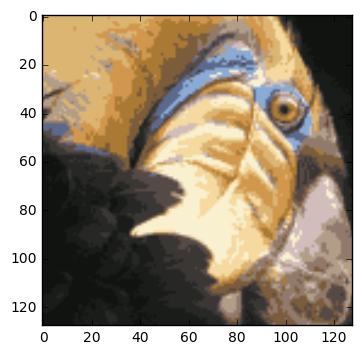

In [150]:
plt.imshow(X_compressed)

We have it. Compressed and obviously with less quality. But also reduced in size: 
- 128px x 128px x (8bit x 3RGB)=393kbit
- 128px x 128px x 4bit + 16x(8bit x 3RGB) = 65kbit